In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [12]:
df = pd.read_csv('csv_chunks_sentiment.csv')

df.drop(columns=['leg','date','language','chunk','tokens'], axis=1, inplace=True)

def classify_sentiment(row):
    positive_score = row['very_positive_BERT'] + row['positive_BERT']
    negative_score = row['very_negative_BERT'] + row['negative_BERT']
    
    if positive_score > negative_score:
        return 'positive'
    else:
        return 'negative'
df["class"], uniques = pd.factorize(df["class"])
df['group'], uniques = pd.factorize(df['group'])

df['sentiment'] = df.apply(classify_sentiment, axis=1)

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)

counts = df['sentiment'].value_counts()

counts

sentiment
negative    935
positive    825
Name: count, dtype: int64

In [4]:
df.dropna(inplace=True)

df

,ID_file,class,obj_pos,ID_cons,year_birth,gender,group,position,length,very_negative_BERT,negative_BERT,neutral_BERT,positive_BERT,very_positive_BERT,sentiment
0,47801,0,1,201.0,1975.0,1,0,2,3141,0.008774,0.017888,0.075363,0.387717,0.510258,positive
1,47801,0,1,77.0,1975.0,1,1,4,914,0.003549,0.008610,0.127961,0.458826,0.401054,positive
2,47801,0,1,224.0,1986.0,1,2,6,1290,0.009853,0.019888,0.075282,0.395171,0.499806,positive
3,47801,0,1,206.0,1966.0,0,3,8,1054,0.011296,0.030934,0.091448,0.370631,0.495692,positive
4,47801,0,1,293.0,1968.0,1,1,10,857,0.004999,0.013256,0.101999,0.432239,0.447508,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,47712,42,24,198.0,1964.0,1,7,2,3924,0.077617,0.205141,0.263839,0.342937,0.110465,positive
1756,47712,42,24,201.0,1975.0,1,0,4,392,0.011394,0.045980,0.193305,0.437839,0.311481,positive
1757,47713,78,25,185.0,1983.0,1,5,2,3138,0.112292,0.290896,0.296555,0.220730,0.079527,negative
1758,47713,78,25,152.0,1962.0,1,1,4,3125,0.067683,0.169414,0.244999,0.343003,0.174901,positive


In [5]:
X = df[['class', 'gender', 'length', 'position', 'obj_pos', 'group','ID_cons','year_birth']]  # Features
y = df['sentiment']  # Target

# Codifica la variabile target (sentiment) con LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividi il dataset in train e test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Crea un modello di regressione logistica
model = LogisticRegression(max_iter=200)

# Allena il modello sui dati di addestramento
model.fit(X_train, y_train)

# Fai le previsioni sui dati di test
y_pred = model.predict(X_test)

# Calcola l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Genera un report di classificazione
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

    negative       0.52      0.71      0.60       260
    positive       0.56      0.37      0.44       265

    accuracy                           0.54       525
   macro avg       0.54      0.54      0.52       525
weighted avg       0.54      0.54      0.52       525



/home/sylcherry/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Definiamo le feature (X) e il target (y)
X = df[['class', 'gender', 'length', 'group']]
y = df['sentiment']

# Codifica la variabile target in numeri (0 = negative, 1 = positive)
y = y.map({'negative': 0, 'positive': 1})

# Dividiamo il dataset in train e test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inizializza e addestra il Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predizioni
y_pred_dt = dt_model.predict(X_test)

# Valutazione
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.52
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.62      0.56       260
           1       0.53      0.43      0.48       265

    accuracy                           0.52       525
   macro avg       0.52      0.52      0.52       525
weighted avg       0.52      0.52      0.52       525



In [10]:
# Inizializza e addestra il Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predizioni
y_pred_rf = rf_model.predict(X_test)

# Valutazione
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.59
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       260
           1       0.63      0.45      0.53       265

    accuracy                           0.59       525
   macro avg       0.60      0.59      0.58       525
weighted avg       0.60      0.59      0.58       525



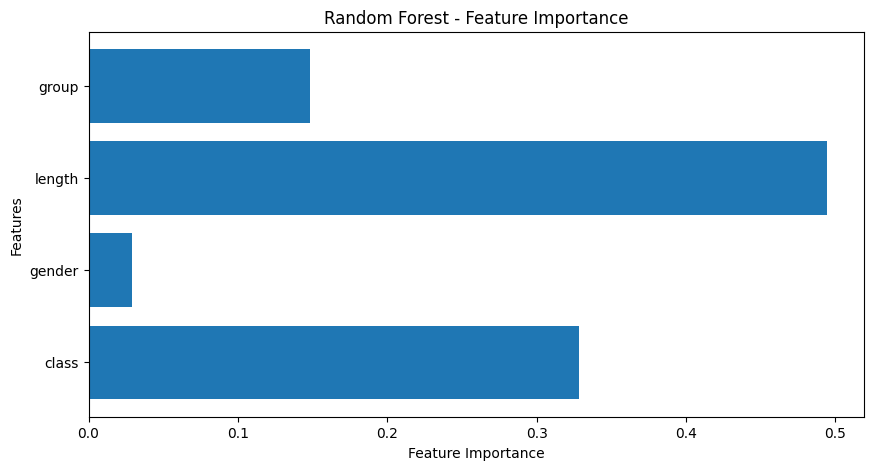

In [11]:
import matplotlib.pyplot as plt

# Ottieni l'importanza delle feature
feature_importance = rf_model.feature_importances_
features = X.columns

# Plot delle feature più importanti
plt.figure(figsize=(10,5))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest - Feature Importance")
plt.show()